In [41]:
#Importaciones
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [42]:
#Lectura de datos
datosGeneracion = pd.read_excel("../Datasets/Información Planta Solar Estacionaria.xlsx")
datosGeneracion.head(4)

,Fecha,Anio,Mes,NumMes,NumSemana,NumDiaAnio,Dia,NumDia,Hora,NumHora,...,Generacion_diff,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,IndiceUV_diff,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
0,2021-07-01 00:00:00,2021,199,7,27,180,6026,1,144600,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-07-01 01:00:00,2021,199,7,27,180,6026,1,144601,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-07-01 02:00:00,2021,199,7,27,180,6026,1,144602,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-07-01 03:00:00,2021,199,7,27,180,6026,1,144603,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
datosGeneracion_sel = datosGeneracion.copy()
datosGeneracion_sel = datosGeneracion_sel.drop(columns = ['Fecha', 'DesCondCielo', 'DesDirViento'])

In [44]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(datosGeneracion_sel)
datosGeneracion_scaled = pd.DataFrame(scaled, columns = datosGeneracion_sel.columns)
datosGeneracion_scaled.head(4)

,Anio,Mes,NumMes,NumSemana,NumDiaAnio,Dia,NumDia,Hora,NumHora,Generacion,...,Generacion_diff,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,IndiceUV_diff,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
0,0.0,0.0,0.545455,0.5,0.5,0.0,0.0,0.000000,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.545455,0.5,0.5,0.0,0.0,0.000053,0.043478,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.545455,0.5,0.5,0.0,0.0,0.000105,0.086957,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.545455,0.5,0.5,0.0,0.0,0.000158,0.130435,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
datosGeneracion_dropna = datosGeneracion_scaled.dropna()
datosGeneracion_dropna.head(4)

,Anio,Mes,NumMes,NumSemana,NumDiaAnio,Dia,NumDia,Hora,NumHora,Generacion,...,Generacion_diff,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,IndiceUV_diff,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
24,0.0,0.0,0.545455,0.5,0.502778,0.001264,0.033333,0.001263,0.000000,0.0,...,0.500199,0.447368,0.527950,0.500000,0.559045,0.494949,0.444444,0.494208,0.563265,0.507246
25,0.0,0.0,0.545455,0.5,0.502778,0.001264,0.033333,0.001315,0.043478,0.0,...,0.500199,0.473684,0.552795,0.494048,0.584171,0.494949,0.444444,0.494208,0.563265,0.507246
26,0.0,0.0,0.545455,0.5,0.502778,0.001264,0.033333,0.001368,0.086957,0.0,...,0.500199,0.473684,0.534161,0.505952,0.559045,0.494949,0.444444,0.494208,0.563265,0.507246
27,0.0,0.0,0.545455,0.5,0.502778,0.001264,0.033333,0.001420,0.130435,0.0,...,0.500199,0.447368,0.503106,0.500000,0.584171,0.494949,0.444444,0.494208,0.563265,0.492754


In [46]:
datosGeneracion_train = datosGeneracion_dropna.sample(frac = 0.7)
y_train = datosGeneracion_train[['Generacion_diff']]
x_train = datosGeneracion_train[['NumSemana', 'NumDiaAnio', 'Hora','Temperatura_diff', 'ProbabilidadLluvia_diff',
                                 'HumedadRelativa_diff', 'VelocidadViento_diff', 'DireccionViento_diff', 'CoberturaNubes',
                                 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'Precipitacion_diff',
                                 'DPT_diff']]

In [47]:
datosGeneracion_test = datosGeneracion_dropna.drop(datosGeneracion_train.index)

y_test = datosGeneracion_test[['Generacion_diff']]
x_test = datosGeneracion_test[['NumSemana', 'NumDiaAnio', 'Hora','Temperatura_diff', 'ProbabilidadLluvia_diff',
                                 'HumedadRelativa_diff', 'VelocidadViento_diff', 'DireccionViento_diff', 'CoberturaNubes',
                                 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'Precipitacion_diff',
                                 'DPT_diff']]

## Modelo lineal

In [48]:
from sklearn import linear_model

In [49]:
model = linear_model.LinearRegression()

In [50]:
model.fit(x_train, y_train)

LinearRegression()

In [51]:
print(f'y = {round(model.intercept_[0], 4)}', end = ' ')
for i in range(len(model.coef_[0])):
    print(f' + X_{i} ({round(model.coef_[0][i], 4)})', end = ' ')

y = 0.5062  + X_0 (0.0575)  + X_1 (-0.056)  + X_2 (-0.0024)  + X_3 (0.1816)  + X_4 (-0.221)  + X_5 (-0.0181)  + X_6 (-0.0125)  + X_7 (-0.0419)  + X_8 (-0.0014)  + X_9 (0.2232)  + X_10 (-0.0134)  + X_11 (0.0053)  + X_12 (-0.0541)  + X_13 (0.0124)  + X_14 (-0.0404) 

In [52]:
y_pred = model.predict(x_test)
y_pred

array([[0.49698562],
       [0.50741135],
       [0.5127012 ],
       ...,
       [0.54410155],
       [0.5008026 ],
       [0.50172224]])

In [53]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae

In [54]:
mape(y_pred, y_test)

0.09132728721536523

In [55]:
mae(y_pred, y_test)

0.04525991796560887

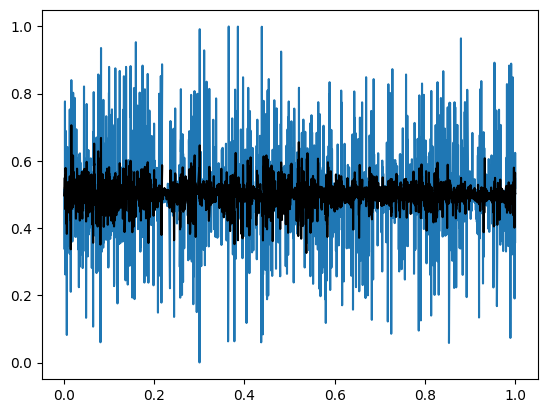

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(x_test["Hora"], y_test)
plt.plot(x_test["Hora"], y_pred, c = 'black')

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, LogisticRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline

In [58]:
def fit(x, y, reg_model = 'RF', n_components = 3, n_jobs = None):
    match reg_model:
        case 'AdaBoost':
            model = AdaBoostRegressor()
        case 'Bagging':
            model = BaggingRegressor(n_jobs = n_jobs)
        case 'BayesRidge':
            model = BayesianRidge()
        case 'Boosting':
            model = GradientBoostingRegressor()
        case 'DecisionTree':
            model = DecisionTreeRegressor(max_depth = 2)
        case 'LassoReg':
            model = Lasso(alpha = 0.1)
        case 'LinearReg':
            model = LinearRegression(n_jobs = n_jobs)
        case 'PLS':
            model = PLSRegression(n_components = n_components)
        case 'PCR':
            model = make_pipeline(PCA(n_components = n_components), LinearRegression(n_jobs = n_jobs))
        case 'RidgeReg':
            model = Ridge(alpha = 0.1)
        case 'RF':
            model = RandomForestRegressor(n_jobs = n_jobs)
        case 'VotingEnsemble':
            gb = GradientBoostingRegressor()
            rf = RandomForestRegressor(n_jobs = n_jobs)
            br = BaggingRegressor(n_jobs = n_jobs)
            ab = AdaBoostRegressor()
            gb.fit(x, y)
            rf.fit(x, y)
            br.fit(x, y)
            ab.fit(x, y)
            model = VotingRegressor([("gb", gb), ("rf", rf), ("br", br), ("ab", ab)], n_jobs = n_jobs)
        case 'VotingLinear':
            pl = PLSRegression(n_components = n_components)
            lr = LinearRegression(n_jobs = n_jobs)
            ri = Ridge(alpha = 0.1)
            la = Lasso(alpha = 0.1)
            pc = make_pipeline(PCA(n_components = n_components), LinearRegression(n_jobs = n_jobs))
            pl.fit(x, y)
            lr.fit(x, y)
            ri.fit(x, y)
            la.fit(x, y)
            pc.fit(x, y)
            model = VotingRegressor([("pl", pl), ("lr", lr), ("ri", ri), ("la", la), ("pc", pc)], n_jobs = n_jobs)
    model.fit(x, y)
    return model

In [59]:
from tqdm import tqdm

import multiprocessing

from timeit import default_timer as timer

In [60]:
try:
        df_results_ed = pd.read_csv('./Resultados_modelos.csv', index_col = 0)
except:
        models_ed = ['AdaBoost', 'Boosting', 'DecisionTree', 'LassoReg', 'PCR',
                      'Bagging', 'RF', 'LinearReg', 'BayesRidge', 'RidgeReg', 'PLS']
        n_jobs = multiprocessing.cpu_count()
        results_ed = {
                'model' : [],
                'mape' : [],
                'mae' : [],
                'time' : []
        }
        for i in tqdm(range(30)):
                df_train = datosGeneracion_dropna.sample(frac = 0.7)
                y_train = df_train[['Generacion_diff']]
                x_train = df_train[['NumSemana', 'NumDiaAnio', 'Hora','Temperatura_diff', 'ProbabilidadLluvia_diff',
                                 'HumedadRelativa_diff', 'VelocidadViento_diff', 'DireccionViento_diff', 'CoberturaNubes',
                                 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'Precipitacion_diff',
                                 'DPT_diff']]
                
                df_test = datosGeneracion_dropna.drop(df_train.index)
                y_test = df_test[['Generacion_diff']]
                x_test = df_test[['NumSemana', 'NumDiaAnio', 'Hora','Temperatura_diff', 'ProbabilidadLluvia_diff',
                                 'HumedadRelativa_diff', 'VelocidadViento_diff', 'DireccionViento_diff', 'CoberturaNubes',
                                 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'Precipitacion_diff',
                                 'DPT_diff']]
                for m in models_ed:
                        start = timer()
                        model = fit(x_train, y_train.Generacion_diff.ravel(), m, n_jobs = n_jobs)
                        end = timer()
                        y_pred = model.predict(x_test)
                        results_ed['model'].append(m)
                        results_ed['mape'].append(mape(y_test, y_pred))
                        results_ed['mae'].append(mae(y_test, y_pred))
                        results_ed['time'].append(end - start)

                df_results_ed = pd.DataFrame(results_ed)
                df_results_ed = df_results_ed.sort_values('mape')
                df_results_ed.to_csv('./Resultados_modelos.csv')

In [61]:
df_results_ed[:50]

,model,mape,mae,time
226,RF,0.090313,0.036614,20.588949
221,Boosting,0.098818,0.039065,3.807788
225,Bagging,0.100205,0.041211,2.250746
222,DecisionTree,0.103339,0.038835,0.022680
223,LassoReg,0.104263,0.038377,0.010467
230,PLS,0.111520,0.044114,0.031413
228,BayesRidge,0.111568,0.044145,0.032043
229,RidgeReg,0.111614,0.044181,0.015176
227,LinearReg,0.111622,0.044188,0.034512
224,PCR,0.112762,0.043121,0.033863


In [115]:
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('mape')

In [63]:
gp_results_ed

,mape,mae,time
model,,,
RF,2.896123e+10,0.038071,19.329816
LassoReg,9.258968e+10,0.039474,0.009206
DecisionTree,9.258393e+10,0.040264,0.026009
Boosting,8.147274e+10,0.040455,4.275699
Bagging,2.105588e+10,0.042160,2.169649
PCR,9.395963e+10,0.044640,0.039603
PLS,9.313708e+10,0.045290,0.024201
BayesRidge,9.413218e+10,0.045295,0.018425
RidgeReg,9.421466e+10,0.045331,0.008703


In [64]:
# Paquete para más opciones gráficas
import seaborn as sns

import matplotlib.patches as mpatches

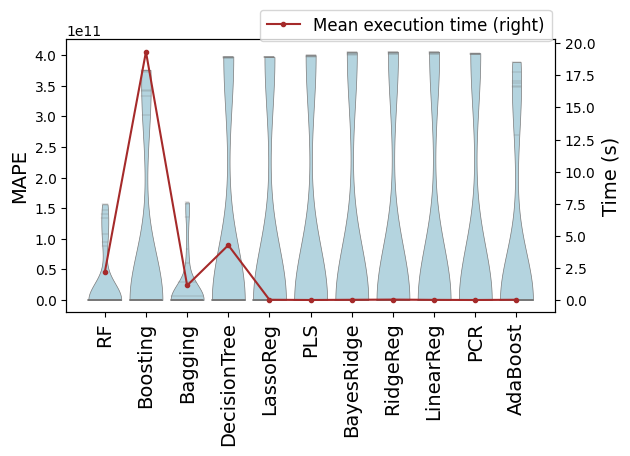

In [116]:
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="mape", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('MAPE', fontsize = 14)
plt.xlabel('')
#patch = mpatches.Patch(color='lightblue', label='MAPE (left)')
#plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
# Simple arrow
#plt.annotate('Selected \n method', xy=(1.02, 40000000), fontsize=12, horizontalalignment='center', rotation = 90)
#plt.legend(handles=[patch], bbox_to_anchor = (0.39, 1.14), fontsize = 12)

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Mean execution time (right)')
plt.ylabel('Time (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

In [66]:
modelRF = RandomForestRegressor(n_jobs = n_jobs)
modelRF.fit(x_train, y_train)

RandomForestRegressor(n_jobs=4)

In [67]:
y_pred = modelRF.predict(x_test)

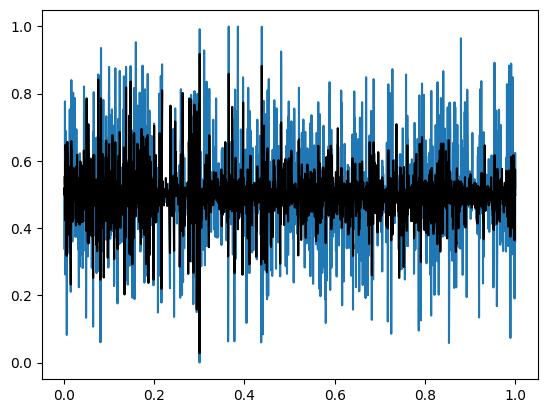

In [68]:
plt.plot(x_test["Hora"], y_test)
plt.plot(x_test["Hora"], y_pred, c = 'black')

In [69]:
modelB = BaggingRegressor(n_jobs = n_jobs)
modelB.fit(x_train, y_train)

BaggingRegressor(n_jobs=4)

In [70]:
y_pred = modelB.predict(x_test)

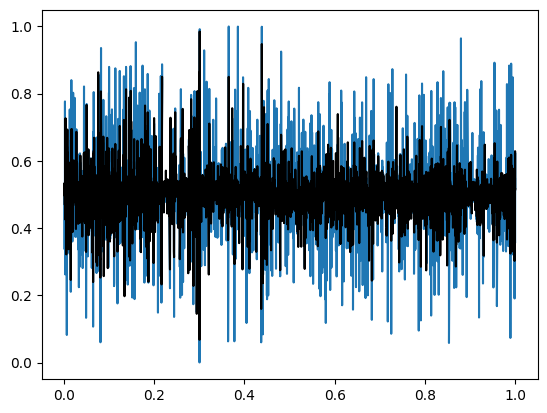

In [71]:
plt.plot(x_test["Hora"], y_test)
plt.plot(x_test["Hora"], y_pred, c = 'black')

In [72]:
datosGeneracion_dropna['Prediction'] = np.nan
datosGeneracion_dropna['Prediction'].update(y_train['Generacion_diff'])

In [73]:
df_y_pred = pd.DataFrame(y_pred, index = y_test.index, columns = ['Generacion_diff'])
df_y_pred

,Generacion_diff
27,0.502094
39,0.534243
41,0.496353
43,0.519120
44,0.510690
...,...
18934,0.530431
18936,0.505396
18937,0.628852
18940,0.512588


In [74]:
datosGeneracion_dropna['Prediction'].update(df_y_pred['Generacion_diff'])
datosGeneracion_dropna['Predicted'] = np.nan
datosGeneracion_dropna['Predicted'].update(df_y_pred['Generacion_diff'])

In [75]:
datosGeneracion_dropna.drop(columns=['Predicted'], inplace=True)

In [76]:
scaled = scaler.fit_transform(datosGeneracion_sel)
datosGeneracion_scaled = pd.DataFrame(scaled, columns = datosGeneracion_sel.columns)
datosGeneracion_scaled[['Generacion', 'Generacion_diff']].head(50)

,Generacion,Generacion_diff
0,0.000000,NaN
1,0.000000,NaN
2,0.000000,NaN
3,0.000000,NaN
4,0.000000,NaN
5,0.000000,NaN
6,0.000000,NaN
7,0.008425,NaN
8,0.026345,NaN
9,0.049537,NaN


In [77]:
datosGeneracion_scaled['Prediction'] = np.nan
datosGeneracion_scaled['Prediction'].update(y_train['Generacion_diff'])
datosGeneracion_scaled['Prediction'].update(df_y_pred['Generacion_diff'])
datosGeneracion_scaled[['Generacion', 'Generacion_diff', 'Prediction']].head(50)

,Generacion,Generacion_diff,Prediction
0,0.000000,NaN,NaN
1,0.000000,NaN,NaN
2,0.000000,NaN,NaN
3,0.000000,NaN,NaN
4,0.000000,NaN,NaN
5,0.000000,NaN,NaN
6,0.000000,NaN,NaN
7,0.008425,NaN,NaN
8,0.026345,NaN,NaN
9,0.049537,NaN,NaN


In [78]:
datosGeneracion_scaled = datosGeneracion_scaled.drop(columns=['Prediction'])

In [79]:
df_descaled = pd.DataFrame(scaler.inverse_transform(datosGeneracion_scaled), columns = datosGeneracion_scaled.columns, index = datosGeneracion_scaled.index)

In [80]:
df_descaled['Prediction'] = np.nan
df_descaled['Prediction'].update(y_train['Generacion_diff'])
df_descaled['Prediction'].update(df_y_pred['Generacion_diff'])
df_descaled[['Generacion', 'Generacion_diff', 'Prediction']].head(50)

,Generacion,Generacion_diff,Prediction
0,0.0000,NaN,NaN
1,0.0000,NaN,NaN
2,0.0000,NaN,NaN
3,0.0000,NaN,NaN
4,0.0000,NaN,NaN
5,0.0000,NaN,NaN
6,0.0000,NaN,NaN
7,252.4751,NaN,NaN
8,789.4489,NaN,NaN
9,1484.4438,NaN,NaN


In [81]:
max_value = df_descaled["Generacion_diff"].max()
min_value = df_descaled["Generacion_diff"].min()

In [82]:
df_descaled["Prediction_diff"] = round((df_descaled["Prediction"]*(max_value - min_value)) + min_value, 2)

In [83]:
df_descaled['Prediction_final'] = np.nan

In [84]:

df_descaled['Prediction_diff'].update(df_descaled.loc[df_descaled.index <= 24]['Generacion'])
df_descaled['Prediction_final'].update(df_descaled.loc[df_descaled.index <= 24]['Generacion'])

In [85]:
df_descaled.loc[df_descaled['Prediction_diff'] <= 0.1] = 0

In [86]:

df_descaled[['Generacion', 'Generacion_diff', 'Prediction', 'Prediction_diff']].head(50)

,Generacion,Generacion_diff,Prediction,Prediction_diff
0,0.0000,0.0000,0.000000,0.0000
1,0.0000,0.0000,0.000000,0.0000
2,0.0000,0.0000,0.000000,0.0000
3,0.0000,0.0000,0.000000,0.0000
4,0.0000,0.0000,0.000000,0.0000
5,0.0000,0.0000,0.000000,0.0000
6,0.0000,0.0000,0.000000,0.0000
7,252.4751,NaN,NaN,252.4751
8,789.4489,NaN,NaN,789.4489
9,1484.4438,NaN,NaN,1484.4438


In [87]:
for i in range(24,len(df_descaled)):
    df_descaled['Prediction_final'][i] = df_descaled['Prediction_diff'][i] + df_descaled["Prediction_diff"][i-24]


In [88]:
df_descaled[['NumHora','Generacion', 'Generacion_diff', 'Prediction', 'Prediction_diff', 'Prediction_final']].head(50)

,NumHora,Generacion,Generacion_diff,Prediction,Prediction_diff,Prediction_final
0,0.0,0.0000,0.0000,0.000000,0.0000,0.0000
1,0.0,0.0000,0.0000,0.000000,0.0000,0.0000
2,0.0,0.0000,0.0000,0.000000,0.0000,0.0000
3,0.0,0.0000,0.0000,0.000000,0.0000,0.0000
4,0.0,0.0000,0.0000,0.000000,0.0000,0.0000
5,0.0,0.0000,0.0000,0.000000,0.0000,0.0000
6,0.0,0.0000,0.0000,0.000000,0.0000,0.0000
7,7.0,252.4751,NaN,NaN,252.4751,252.4751
8,8.0,789.4489,NaN,NaN,789.4489,789.4489
9,9.0,1484.4438,NaN,NaN,1484.4438,1484.4438


In [89]:
def line_plotting(title, data, x, y, y2, x_label, y_label, width, height):
    """General function to plot"""
    plt.figure(figsize=(width,height))
    plt.plot(data[x], data[y], color='blue')   
    plt.plot(data[x], data[y2], color='black')  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [90]:
datosGeneracion["Prediction"] = df_descaled['Prediction_final']

In [91]:
datosGeneracion[['Hora', 'Generacion', 'Prediction']].head(50)

,Hora,Generacion,Prediction
0,144600,0.0000,0.0000
1,144601,0.0000,0.0000
2,144602,0.0000,0.0000
3,144603,0.0000,0.0000
4,144604,0.0000,0.0000
5,144605,0.0000,0.0000
6,144606,0.0000,0.0000
7,144607,252.4751,252.4751
8,144608,789.4489,789.4489
9,144609,1484.4438,1484.4438


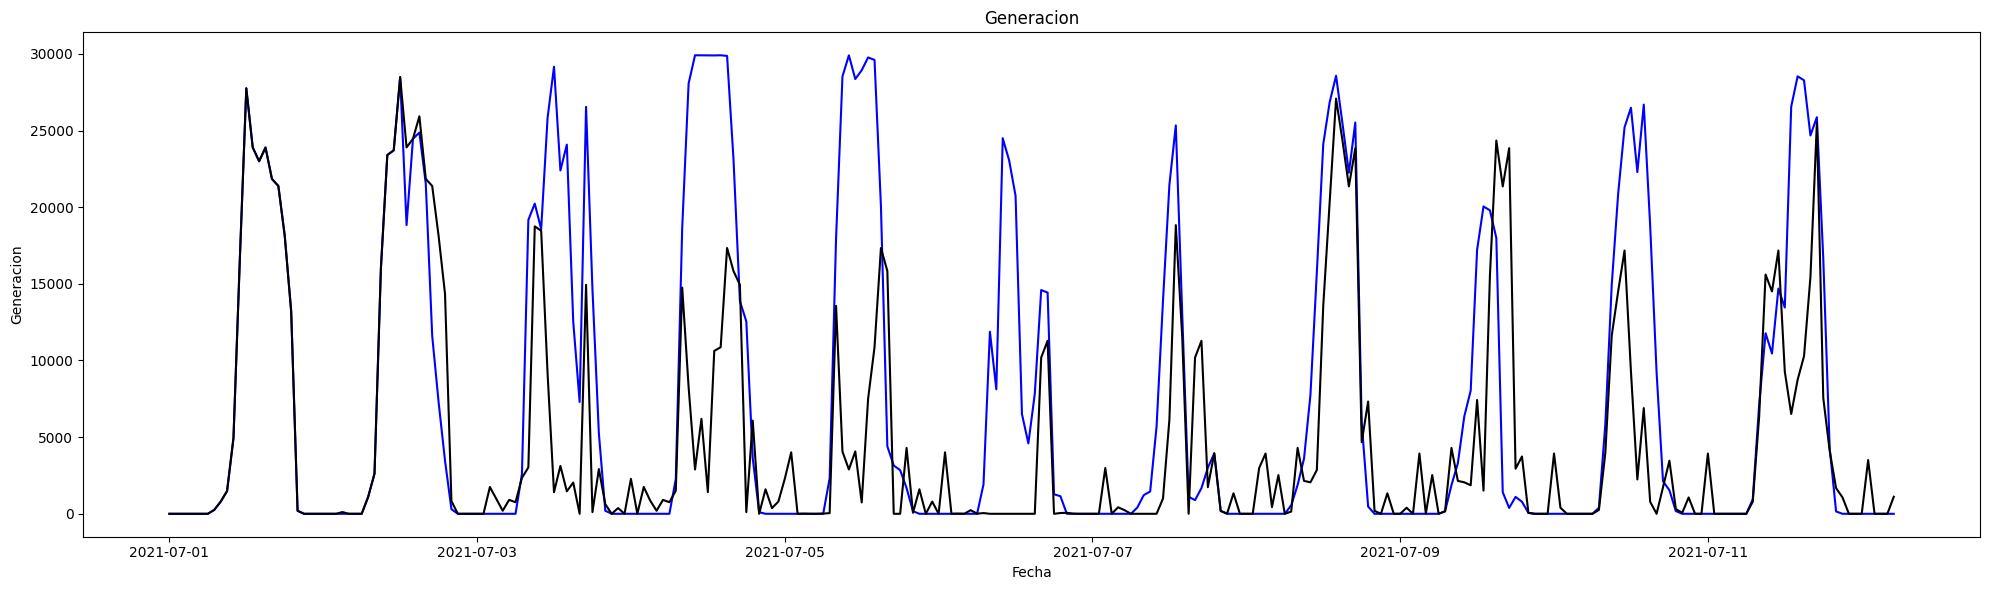

In [92]:
line_plotting('Generacion', datosGeneracion[:270], 'Fecha', 'Generacion', 'Prediction', 'Fecha', 'Generacion', 20, 6)

In [103]:
datosGeneracion_train2 = datosGeneracion_dropna.loc[1:13245]
y_train2 = datosGeneracion_train2[['Generacion_diff']]
x_train2 = datosGeneracion_train2[['NumSemana', 'NumDiaAnio', 'Hora','Temperatura_diff', 'ProbabilidadLluvia_diff',
                                 'HumedadRelativa_diff', 'VelocidadViento_diff', 'DireccionViento_diff', 'CoberturaNubes',
                                 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'Precipitacion_diff',
                                 'DPT_diff']]

In [104]:
datosGeneracion_test2 = datosGeneracion_dropna.drop(datosGeneracion_train2.index)

y_test2 = datosGeneracion_test2[['Generacion_diff']]
x_test2 = datosGeneracion_test2[['NumSemana', 'NumDiaAnio', 'Hora','Temperatura_diff', 'ProbabilidadLluvia_diff',
                                 'HumedadRelativa_diff', 'VelocidadViento_diff', 'DireccionViento_diff', 'CoberturaNubes',
                                 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'Precipitacion_diff',
                                 'DPT_diff']]

In [105]:
n_jobs = multiprocessing.cpu_count()

In [106]:
try:
        df_results_ed2 = pd.read_csv('./Resultados_modelos2.csv', index_col = 0)
except:
        models_ed = ['AdaBoost', 'Boosting', 'DecisionTree', 'LassoReg', 'PCR',
                      'Bagging', 'RF', 'LinearReg', 'BayesRidge', 'RidgeReg', 'PLS']
        n_jobs = multiprocessing.cpu_count()
        results_ed2 = {
                'model' : [],
                'mape' : [],
                'mae' : [],
                'time' : []
        }
        for i in tqdm(range(30)):
                for m in models_ed:
                        start = timer()
                        model = fit(x_train2, y_train2.Generacion_diff.ravel(), m, n_jobs = n_jobs)
                        end = timer()
                        y_pred2 = model.predict(x_test2)
                        results_ed2['model'].append(m)
                        results_ed2['mape'].append(mape(y_test2, y_pred2))
                        results_ed2['mae'].append(mae(y_test2, y_pred2))
                        results_ed2['time'].append(end - start)

                df_results_ed2 = pd.DataFrame(results_ed2)
                df_results_ed2 = df_results_ed2.sort_values('mape')
                df_results_ed2.to_csv('./Resultados_modelos2.csv')

In [107]:
gp_results_ed2 = df_results_ed2.groupby('model').mean()
gp_results_ed2 = gp_results_ed2.sort_values('mape')

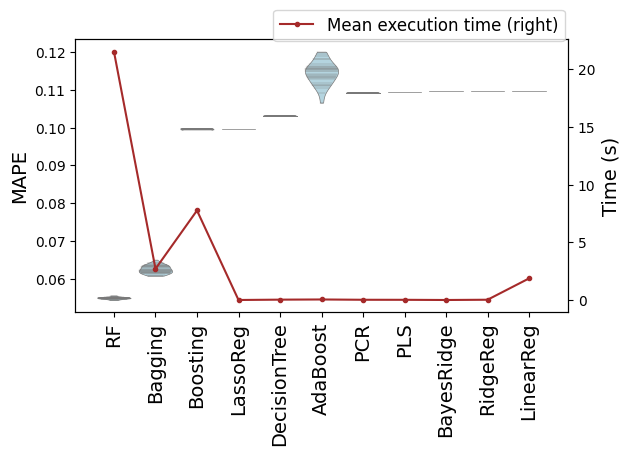

In [108]:
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="mape", data=df_results_ed2, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('MAPE', fontsize = 14)
plt.xlabel('')
#patch = mpatches.Patch(color='lightblue', label='MAPE (left)')
#plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
# Simple arrow
#plt.annotate('Selected \n method', xy=(1.02, 40000000), fontsize=12, horizontalalignment='center', rotation = 90)
#plt.legend(handles=[patch], bbox_to_anchor = (0.39, 1.14), fontsize = 12)

ax2 = ax.twinx()
ax2.plot(gp_results_ed2.time, '.-', c = 'brown', label = 'Mean execution time (right)')
plt.ylabel('Time (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

In [109]:
modelB2 = BaggingRegressor(n_jobs=n_jobs)
modelB2.fit(x_train, y_train)

BaggingRegressor(n_jobs=4)

In [110]:
y_pred2 = modelB2.predict(x_test)

In [111]:
mae(y_test, y_pred)

0.041826987403384655

ValueError: x and y must have same first dimension, but have shapes (5700,) and (5677,)

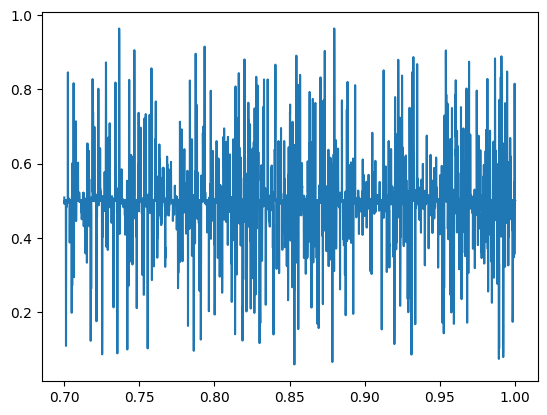

In [112]:
plt.plot(x_test2["Hora"], y_test2)
plt.plot(x_test2["Hora"], y_pred2, c = 'black')

In [113]:
df_y_pred2 = pd.DataFrame(y_pred2, index = y_test2.index, columns = ['Generacion_diff'])
df_y_pred2

ValueError: Shape of passed values is (5677, 1), indices imply (5700, 1)

In [ ]:
datosGeneracion_dropna2 = datosGeneracion_dropna.copy()
datosGeneracion_dropna2['Prediction'].update(df_y_pred2['Generacion_diff'])
datosGeneracion_dropna2['Predicted'] = np.nan
datosGeneracion_dropna2['Predicted'].update(df_y_pred2['Generacion_diff'])

In [ ]:
datosGeneracion_dropna2.drop(columns=['Predicted'], inplace=True)

In [ ]:
scaled2 = scaler.fit_transform(datosGeneracion_sel)
datosGeneracion_scaled2 = pd.DataFrame(scaled2, columns = datosGeneracion_sel.columns)
datosGeneracion_scaled2[['Generacion', 'Generacion_diff']].head(50)

,Generacion,Generacion_diff
0,0.000000,NaN
1,0.000000,NaN
2,0.000000,NaN
3,0.000000,NaN
4,0.000000,NaN
5,0.000000,NaN
6,0.000000,NaN
7,0.008425,NaN
8,0.026345,NaN
9,0.049537,NaN


In [ ]:
datosGeneracion_scaled2['Prediction'] = np.nan
datosGeneracion_scaled2['Prediction'].update(y_train2['Generacion_diff'])
datosGeneracion_scaled2['Prediction'].update(df_y_pred2['Generacion_diff'])
datosGeneracion_scaled2[['Generacion', 'Generacion_diff', 'Prediction']].head(50)

,Generacion,Generacion_diff,Prediction
0,0.000000,NaN,NaN
1,0.000000,NaN,NaN
2,0.000000,NaN,NaN
3,0.000000,NaN,NaN
4,0.000000,NaN,NaN
5,0.000000,NaN,NaN
6,0.000000,NaN,NaN
7,0.008425,NaN,NaN
8,0.026345,NaN,NaN
9,0.049537,NaN,NaN


In [ ]:
datosGeneracion_scaled2 = datosGeneracion_scaled2.drop(columns=['Prediction'])

In [ ]:
df_descaled2 = pd.DataFrame(scaler.inverse_transform(datosGeneracion_scaled2), columns = datosGeneracion_scaled2.columns, index = datosGeneracion_scaled2.index)

In [ ]:
df_descaled2['Prediction'] = np.nan
df_descaled2['Prediction'].update(y_train2['Generacion_diff'])
df_descaled2['Prediction'].update(df_y_pred2['Generacion_diff'])
df_descaled2[['Generacion', 'Generacion_diff', 'Prediction']].head(50)

,Generacion,Generacion_diff,Prediction
0,0.0000,NaN,NaN
1,0.0000,NaN,NaN
2,0.0000,NaN,NaN
3,0.0000,NaN,NaN
4,0.0000,NaN,NaN
5,0.0000,NaN,NaN
6,0.0000,NaN,NaN
7,252.4751,NaN,NaN
8,789.4489,NaN,NaN
9,1484.4438,NaN,NaN


In [ ]:
max_value = df_descaled2["Generacion_diff"].max()
min_value = df_descaled2["Generacion_diff"].min()

In [ ]:
df_descaled2["Prediction_diff"] = round((df_descaled2["Prediction"]*(max_value - min_value)) + min_value, 2)

In [ ]:
df_descaled2['Prediction_final'] = np.nan

In [ ]:

df_descaled2['Prediction_diff'].update(df_descaled2.loc[df_descaled2.index <= 24]['Generacion'])
df_descaled2['Prediction_final'].update(df_descaled2.loc[df_descaled2.index <= 24]['Generacion'])

In [ ]:
df_descaled2.loc[df_descaled2['Prediction_diff'] <= 0.1] = 0

In [ ]:
for i in range(24,len(df_descaled2)):
    df_descaled2['Prediction_final'][i] = df_descaled2['Prediction_diff'][i] + df_descaled2["Prediction_diff"][i-24]


In [ ]:
datosGeneracion["Prediction2"] = df_descaled2['Prediction_final']

In [ ]:
datosGeneracion[['Hora', 'Generacion', 'Prediction', 'Prediction2']].head(50)

,Hora,Generacion,Prediction,Prediction2
0,144600,0.0000,0.0000,0.0000
1,144601,0.0000,0.0000,0.0000
2,144602,0.0000,0.0000,0.0000
3,144603,0.0000,0.0000,0.0000
4,144604,0.0000,0.0000,0.0000
5,144605,0.0000,0.0000,0.0000
6,144606,0.0000,0.0000,0.0000
7,144607,252.4751,252.4751,252.4751
8,144608,789.4489,789.4489,789.4489
9,144609,1484.4438,1484.4438,1484.4438
